# IMPORTING THE PACKAGE

In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mRuyWWMFSCxxvMQsi4y1hfY99MRQCF3xbojcx206vX9R',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'loanprediction-donotdelete-pr-cgcwiwxcgvy2vm'
object_key = 'loan_prediction.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

# Handle the Missing values

In [5]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Treating the Null Value

We will fill the missing values in numeric data type using the mean value of that particular column and categorical data type using the most repeated value

In [6]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns


In [7]:
numerical_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [8]:
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
#replace + with non value 
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [10]:
#checking the null values now
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now the null value is retreated

# Handling Categorical Values

In [11]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [14]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['Married'].replace({'Yes':1,'No':0},inplace=True)

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [17]:
df['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)

In [18]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [20]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [21]:
df['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)

In [22]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [23]:
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [24]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [25]:
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

In [26]:
df['CoapplicantIncome']=df['CoapplicantIncome'].astype("int64")
df['LoanAmount']=df['LoanAmount'].astype("int64")
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype("int64")
df['Credit_History']=df['Credit_History'].astype("int64")

In [27]:
# dummy columns are created for the categories in Loan_ID
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df.Loan_ID)

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,2,1,1,0,1,1,3000,0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,4,1,0,0,1,0,6000,0,141,360,1,2,1


In [29]:
df.drop(columns = 'Loan_ID', inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,1,1,0,1,1,3000,0,66,360,1,2,1
3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,1,0,0,1,0,6000,0,141,360,1,2,1


# Balancing The Dataset

In [30]:
!pip install scikit-learn==1.0.2
!pip install imbalanced-learn==0.9.0

     |████████████████████████████████| 199 kB 23.3 MB/s eta 0:00:01


In [31]:
from imblearn.combine import SMOTETomek

In [32]:
smote = SMOTETomek(0.90)

In [33]:
#dividing the dataset into dependent and independent y and x respectively

y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [34]:
#creating the new x and y for balance data
x_bal,y_bal = smote.fit_resample(x,y)

In [35]:
#printing the value before and after balancing 
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    364
0    321
Name: Loan_Status, dtype: int64


# Scaling The Data

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)

In [38]:
x_bal = pd.DataFrame(x_bal)

In [39]:
x_bal.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.522718,-1.174084,-0.732653,0.597022,-0.309839,0.094216,-0.537368,-0.298189,0.30039,0.588027,1.359919
1,0.522718,0.851728,-0.732653,0.597022,3.227486,-0.388568,-0.537368,-0.963649,0.30039,0.588027,1.359919
2,0.522718,0.851728,-0.732653,-1.674979,-0.309839,-0.459231,0.240135,-0.298189,0.30039,0.588027,1.359919
3,0.522718,-1.174084,-0.732653,0.597022,-0.309839,0.119804,-0.537368,-0.039399,0.30039,0.588027,1.359919
4,0.522718,0.851728,1.380473,0.597022,3.227486,0.021011,0.846179,1.513342,0.30039,0.588027,1.359919


We will perform scaling only on the input values


# Splitting Data Into Train And Test

In [40]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.33, random_state = 42)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(458, 11)
(458,)
(227, 11)
(227,)


# MODELING

# Xgboost Model

In [43]:
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [44]:
model = GradientBoostingClassifier() 

In [45]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [46]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1])

In [47]:
#confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_test ,y_pred))

Confusion matrix
[[70 44]
 [18 95]]


In [48]:
#Classification report
print("Classification report")
print(classification_report (y_test,y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       114
           1       0.68      0.84      0.75       113

    accuracy                           0.73       227
   macro avg       0.74      0.73      0.72       227
weighted avg       0.74      0.73      0.72       227



In [ ]:
y_pred=model.predict(x_test)
y_pred1=model.predict(x_train)

In [50]:
print('Testing accuracy: ',accuracy_score(y_test,y_pred))
print('Training accuracy: ',accuracy_score(y_train,y_pred1))

Testing accuracy:  0.8018433179723502
Training accuracy:  0.9522727272727273


In [51]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Loan_Status,,
0,69,32
1,11,105


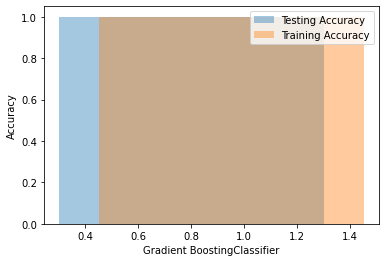

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(accuracy_score(y_test,y_pred), label = 'Testing Accuracy')
sns.distplot(accuracy_score(y_train,y_pred1), label = 'Training Accuracy')
  
plt.legend()
plt.xlabel('Gradient BoostingClassifier')
plt.ylabel('Accuracy')
plt.show()

# Model Saving

In [53]:
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']




# IBM Deployment

In [54]:
!pip install -U ibm-watson-machine-learning

In [55]:
from ibm_watson_machine_learning import APIClient
import json

# Save the Deployment Model

In [72]:
wml_credentials = {
    "apikey" : "hmIOFhnjuvRGrJaKtFnyvNKEQTINuL4eRrcnbp6K7c8R",
    "url" : "https://us-south.ml.cloud.ibm.com"
}

In [75]:
wml_client = APIClient(wml_credentials)
wml_client

In [76]:
wml_client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/43edbb846241416fbd0b354bffbeee9c:c5377acc-a98d-4f06-9cac-ede539867420::',
      'guid': 'c5377acc-a98d-4f06-9cac-ede539867420',
      'name': 'Watson Machine Learning-eq',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Smart-Lender',
    'scope': {'bss_account_id': '43edbb846241416fbd0b354bffbeee9c'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'd8c72dc3-e066-4042-848e-a4c1cab8fef2',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '437f9bf41cbd4f63956d1f1fcfc61a44',
        'api_key': '0RdRyTTd6WFZAlPhvl34KXX-LTTJFaHrnCAq3ii1u8e_',
        'secret_access_key': '0c6f0f90644a04434cabec3408b28e6ded59caef4cda6b8c',
        'service_id': 'ServiceId-316b941b-c5e1-49bb-9b26-bff6c043170f'},
       'editor': {'access_key_id': 'ea96e976fc234dc59d95203f86442b88',
        'api_key

In [78]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
877f81dd-5be6-4bf6-a0f9-54dc995e4548  Smart-Lender  2022-10-25T15:59:31.208Z
------------------------------------  ------------  ------------------------


In [79]:
SPACE_ID= "877f81dd-5be6-4bf6-a0f9-54dc995e4548"

In [80]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [81]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

# Save and Deploy the model

In [82]:
import sklearn
sklearn.__version__

'1.0.2'

In [83]:
software_space_uid = wml_client.software_specifications.get_uid_by_name('runtime-22.1-py3.9')
software_space_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [84]:
MODEL_NAME = 'Model_building'
DEPLOYMENT_NAME = 'Smart-Lender'
DEMO_MODEL = model

In [85]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_space_uid 
}

In [86]:
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=y_pred1, 
    training_target=y_train
)

In [87]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Loan_Status',
  'schemas': {'input': [{'fields': [{'name': 'f1', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-17T15:56:57.782Z',
  'id': '7a5b7809-7f6d-4ae7-bbe9-8f8ffb85f6b3',
  'modified_at': '2022-11-17T15:57:00.624Z',
  'name': 'Model_building',
  'owner': 'IBMid-664003ZV1K',
  'resource_key': 'abe255b0-0ff9-42f8-bd95-a4ad75025663',
  'space_id': '877f81dd-5be6-4bf6-a0f9-54dc995e4548'},
 'system': {'warnings': []}}

In [89]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'7a5b7809-7f6d-4ae7-bbe9-8f8ffb85f6b3'

In [90]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [92]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '7a5b7809-7f6d-4ae7-bbe9-8f8ffb85f6b3' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4144bc36-880e-4bd8-b60c-2824cde9f784'
------------------------------------------------------------------------------------------------


